# TP 5: Algèbre linéaire et codes

Dans la suite, on travaille modulo 2. Il faudra donc utiliser les fonctions du cours qui permettent de calculer modulo 2 des listes ou des vecteurs.

## 1. Distance et poinds de Hamming

Pour $x$ et $y$ éléments de $\{0,1\}$, on définit la distance de Hamming par: 
$$d(x,y)=\left\{
\begin{array}{ll}
1&\mbox{si } x\neq y\\
0&\mbox{si } x=y
\end{array}
\right.$$

On étend cette distance aux vecteurs binaires de dimension $n$ par:
$$d_H(x,y)=\sum_{i=1}^n d(x_i,y_i)$$

Intuitivement, la distance de Hamming compte le nombre de positions où les 2 vecteurs diffèrent

1. Écrivez une fonction `Hamming` qui calcule la distance de Hamming entre deux vecteurs binaires de même longueur

In [1]:
def Hamming(x,y):
    n = len(x)
    def H(x,y) : 
        if x != y : return 1
        return 0
    return sum(H(x[i],y[i]) for i in range(n))

Hamming([1,2,4,5],[0,2,3,5])


2

Une fonction utile pour les codes est celle qui compte la distance de Hamming au vecteur nul, appelée poids de Hamming et notée $w$: $$w(x)=d_H(0,x)$$

2. Ecrivez une fonction `poids` qui calcule le poids de Hamming d'un vecteur binaire.

In [2]:
def poids(v):
    return Hamming([0]*(len(v)),v)
poids([0,1,2,8,0])

3

La distance minimale d'un code est le poids minimal des mots (non nuls) du code. Expliquez comment obtenir la liste des mots du code sans le mot nul (pensez à la différence de deux ensembles).

In [ ]:
list(C-{(0,0,0)})

3. Sur le code $C=\{(0, 0, 0),(1, 0, 1), (0, 1, 1), (1, 1, 0)\}$, calculez la distance minimale.

In [3]:
C = {(0,0,0),(1,0,1),(0,1,1),(1,1,0)}
liste_code = list(C-{(0,0,0)})
p = [poids(i) for i in liste_code]
min(p) 

2

## 2. Détection ou correction des erreurs

La distance minimale $d(C)$ d'un code $C$ permet de calculer combien d'erreurs peuvent être détectées $e_d$ ou corrigées $e_c$ par les égalités suivantes:
$$\begin{array}
e_d = d(C) -1\\
e_c = \lfloor\frac{d(C)-1}{2}\rfloor
\end{array}$$

1. Quelle est la capacité de détection (ou de correction) du code précédent $C=\{(0, 0, 0),(1, 0, 1), (0, 1, 1), (1, 1, 0)\}$

In [4]:
ed = min(p) - 1
ec = abs((min(p)-1)/2)

## 3. Etude d'un code correcteur d'erreurs

Soit le code engendré par la matrice génératrice $G$

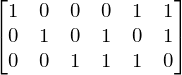

In [1]:
from sympy import *
init_printing()
G=Matrix([[1, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 1, 0]])
G

In [28]:
def listMod2(l) : return [i%2 for i in l]
def vecMod2(v) : return Matrix(listMod2(v))
def llistMod2(m) :
    return [listMod2(i) for i in m]
def matMod2(m):
    r = []
    n = m.rank()
    for i in range(n):
        r.append(listMod2(m[i,:]))
    return Matrix(r)

In [3]:
def uplets(n):
    from itertools import product
    a = [range(0,2)]*n
    r = tuple(product(*a))
    return r

1. Quels sont les mots du code?

In [4]:
m = uplets(3)
C1 = []
for i in m :
    C1.append(list(Matrix(3,1,i).T*G))
    print(i,' |-> ', list(Matrix(3,1,i).T*G))


(0, 0, 0)  |->  [0, 0, 0, 0, 0, 0]
(0, 0, 1)  |->  [0, 0, 1, 1, 1, 0]
(0, 1, 0)  |->  [0, 1, 0, 1, 0, 1]
(0, 1, 1)  |->  [0, 1, 1, 2, 1, 1]
(1, 0, 0)  |->  [1, 0, 0, 0, 1, 1]
(1, 0, 1)  |->  [1, 0, 1, 1, 2, 1]
(1, 1, 0)  |->  [1, 1, 0, 1, 1, 2]
(1, 1, 1)  |->  [1, 1, 1, 2, 2, 2]


2. Quelle est la longueur et la dimension de ce code?

In [6]:
#code de dimension 3 de longueur 8
llistMod2(C1)

3. Quelle en est la distance minimale?

In [11]:
p = [poids(i) for i in C1[1:]]
min(p)

3

4. Quelle est sa capacité de détection/correction?

In [12]:
ed = min(p)-1
ec = abs((min(p)-1)/2)

5. Trouvez sa matrice de contrôle

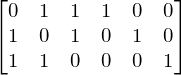

In [41]:
H = G.nullspace()
H1 =[listMod2(i) for i in H]
H2 = Matrix(H1)
H2

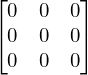

In [29]:
matMod2(G*Matrix(H1).T)

6. Calculez la table des syndromes

In [45]:
def unitVector(n,i):
    return Matrix([1 if j==i else 0 for j in range(n)])

def syndrome(recu):
    return vecMod2(H2*recu)

for i in range(6):
    print(list(unitVector(6,i)),list(syndrome(unitVector(6,i))))

[1, 0, 0, 0, 0, 0] [0, 1, 1]
[0, 1, 0, 0, 0, 0] [1, 0, 1]
[0, 0, 1, 0, 0, 0] [1, 1, 0]
[0, 0, 0, 1, 0, 0] [1, 0, 0]
[0, 0, 0, 0, 1, 0] [0, 1, 0]
[0, 0, 0, 0, 0, 1] [0, 0, 1]


7. Corrigez (ou non les mots reçus suivants) : $(1,1,0,1,1,0),(1,1,1,0,0,1)$

In [48]:
syndrome(Matrix([1,1,0,1,1,0]))

In [49]:
syndrome(Matrix([1,1,1,0,0,1]))

In [50]:
vecMod2(Matrix([1,1,1,0,0,1])+ Matrix([0,0,0,0,0,1]))